# DFT Basic Images
**A. Display 8x8 basic images of DFT conversion.**

**B. Due to the preservation of the structure in the base images with higher dimensions, if DFT conversion is applied, which of the base images will have more weight for each of the following images?**

**C. Display Fourier transform of each of the above images in both size and phase as well as real and imaginary sections.**

### Part A

The following code snippet import required third-party libraries:
+ `cv2` for reading and utilizing image processing functions
+ `numpy` for calculating and considering images as numerical matrixes
+ `matplotlib.pyplot` for showing images in the output

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In the following code snippet, we will calculate the transform matrix, then we will multiple each column of it with the transposed column to find basic images.

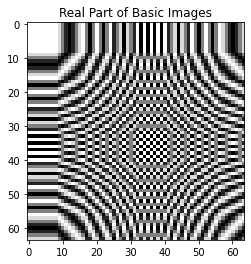

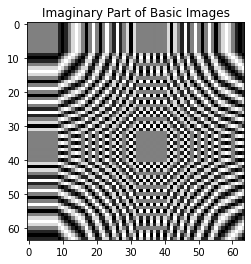

In [2]:
N = 8
# Calculate transform matrix
F = np.zeros((N, N), dtype=np.complex)
for n in range(1, N + 1):
    for k in range(1, N + 1):
        F[n - 1, k - 1] = np.exp(-1j * 2 * (np.pi / N) * (n - 1) * (k - 1))
# Define zero matrix for result
A = np.zeros((N ** 2, N ** 2), dtype=np.complex)

# Multiple each column with transposed column to find basic images
for u in range(N):
    for v in range(N):
        i, j = u * 8, v * 8
        column_u = F[:, u]
        row_v = F[v, :]
        A[i : i + 8, j : j + 8] = np.outer(column_u, row_v)
# Show real part of image
plt.imshow(A.real, cmap="gray")
plt.title("Real Part of Basic Images")
plt.show()

# Show imaginary part of image
plt.imshow(A.imag, cmap="gray")
plt.title("Imaginary Part of Basic Images")
plt.show()


### Part B
We will load two images, calculate their Fourier transform, and shifted versions of them. Then we will display logarithm of their magnitude (We couldn't conclude any information of magnitude itself because the range of numbers is very large) and decide on their structure based on present basic images.

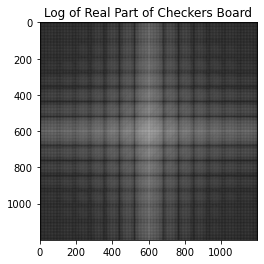

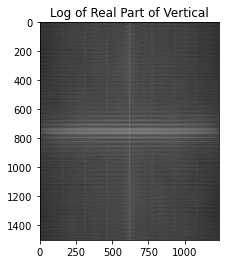

In [3]:
# Load image
checker_board = cv2.imread("../../images/CheckerBoard.png", 0)

# Use FFT
F = np.fft.fft2(checker_board)
F = np.fft.fftshift(F)

# Calculate logarithm of transformed image
log_F = np.log(1 + np.abs(F))

# Show image
plt.imshow(log_F.real, cmap="gray")
plt.title("Log of Real Part of Checkers Board")
plt.show()

# Load image
vertical = cv2.imread("../../images/vertical.png", 0)

# Use FFT
F = np.fft.fft2(vertical)
F = np.fft.fftshift(F)
# Calculate lograithm of transformed image
log_F = np.log(1 + np.abs(F))

# Show image
plt.imshow(log_F.real, cmap="gray")
plt.title("Log of Real Part of Vertical")
plt.show()


As we can see in the first image, it has both vertical and horizontal structures, so the transformed version involves the first columns and rows and corresponding basic images. (central rows and columns in shifted version).

In the second image, we only have a vertical structure so the transformed image only has first rows and rows and corresponding basic images. (central row in the shifted version).

### Part C
In the following lines, we will calculate Fourier transform and show real and imaginary parts. Then we will calculate phase using `np.arctan2()` function. Finally, we will show the logarithm of magnitude.

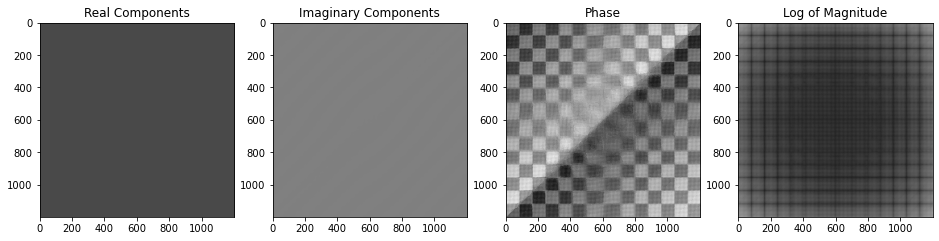

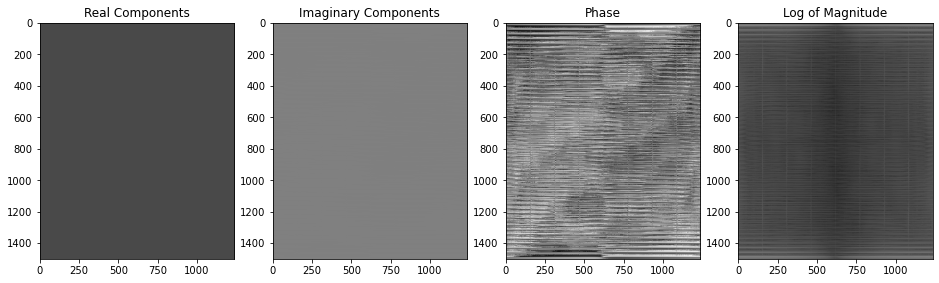

In [4]:
# Calculate transformed image
F = np.fft.fft2(checker_board)

# Calculate phase
phase = np.arctan2(F.imag, F.real)

# Show different versions of image
f, subplt = plt.subplots(1, 4, figsize=(16, 12))
subplt[0].imshow(F.real, cmap="gray")
subplt[0].set_title("Real Components")
subplt[1].imshow(F.imag, cmap="gray")
subplt[1].set_title("Imaginary Components")
subplt[2].imshow(phase, cmap="gray")
subplt[2].set_title("Phase")
subplt[3].imshow(np.log(1 + np.abs(F)), cmap="gray")
subplt[3].set_title("Log of Magnitude")
plt.show()

# Calculate transformed image
F = np.fft.fft2(vertical)

# Calculate phase
phase = np.arctan2(F.imag, F.real)

# Show different versions of image
f, subplt = plt.subplots(1, 4, figsize=(16, 12))
subplt[0].imshow(F.real, cmap="gray")
subplt[0].set_title("Real Components")
subplt[1].imshow(F.imag, cmap="gray")
subplt[1].set_title("Imaginary Components")
subplt[2].imshow(phase, cmap="gray")
subplt[2].set_title("Phase")
subplt[3].imshow(np.log(1 + np.abs(F)), cmap="gray")
subplt[3].set_title("Log of Magnitude")
plt.show()
